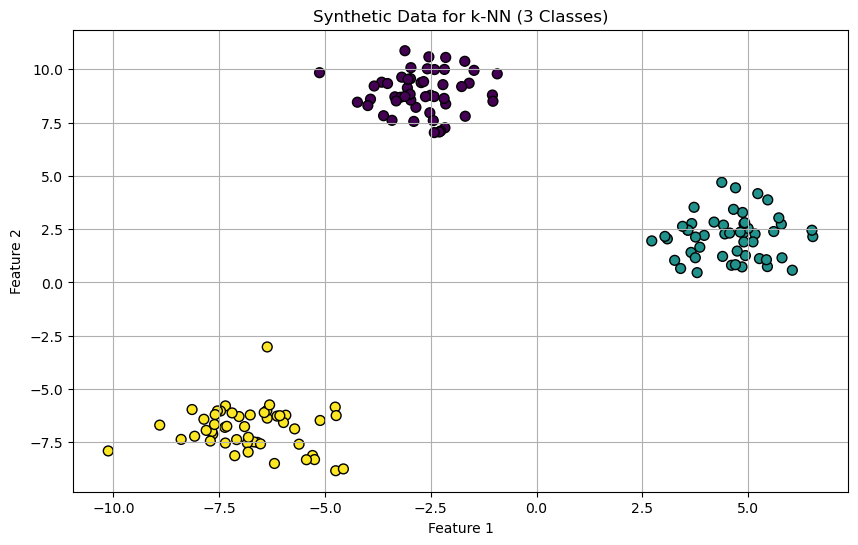

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# --- 1a: Generate Synthetic Data with 3 Classes ---

# We'll create 150 samples divided among 3 distinct centers (classes)
X, y = make_blobs(n_samples=150, centers=3, random_state=42, cluster_std=1.0)

# --- 1b: Visualize the Data ---
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')

plt.title('Synthetic Data for k-NN (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# --- 2a: Create an instance of the k-NN model ---
# We specify the most important hyperparameter: n_neighbors (which is 'k')
k = 5
model = KNeighborsClassifier(n_neighbors=k)


# --- 2b: "Train" the model ---
# For k-NN, the .fit() method is extremely fast. It simply loads
# the data into the model's memory for later comparison.
print(f"--- Creating a k-NN model with k={k} ---")
model.fit(X, y)
print("--- Model training complete (data has been memorized) ---")

--- Creating a k-NN model with k=5 ---
--- Model training complete (data has been memorized) ---


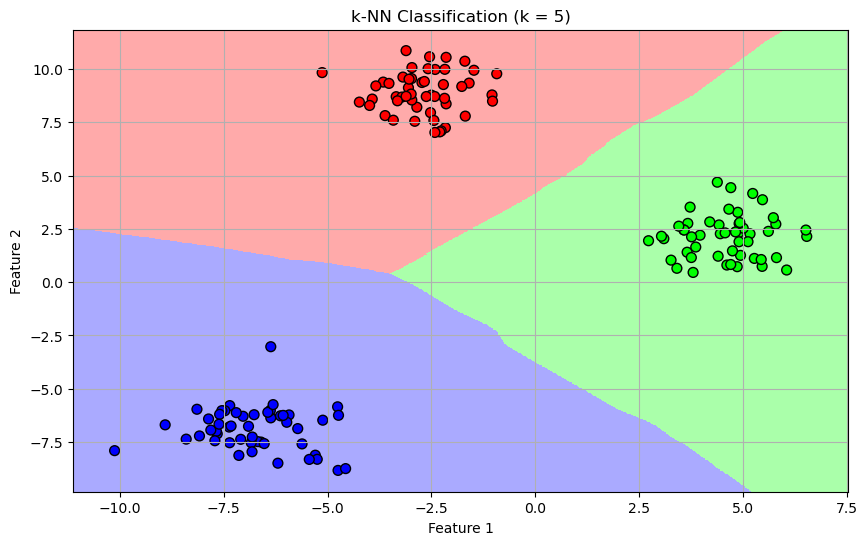

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_knn_boundary(model, X, y):
    """
    A helper function to plot the decision boundary for a k-NN model.
    """
    plt.figure(figsize=(10, 6))
    
    # 1. Define a color map for the background regions
    # We want light, transparent colors for the background
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    # We want solid colors for the actual data points
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # 2. Create a grid to evaluate the model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 3. Make predictions on every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 4. Plot the decision regions
    # pcolormesh will color the background based on the predicted class in Z
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 5. Plot the original training points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"k-NN Classification (k = {model.n_neighbors})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# --- Call the function to create the plot ---
plot_knn_boundary(model, X, y)

In [5]:
from sklearn.metrics import accuracy_score

# --- 1: Use the trained model to make predictions ---
# The .predict() method finds the k-nearest neighbors for each point in X
# and returns the class with the most votes.
y_pred = model.predict(X)


# --- 2: Calculate the accuracy ---
# We compare the true labels (y) with our model's predictions (y_pred).
accuracy = accuracy_score(y, y_pred)


# --- 3: Display the result ---
print(f"The accuracy of our k-NN model (with k={k}) is: {accuracy * 100:.2f}%")


The accuracy of our k-NN model (with k=5) is: 100.00%
